# Mulitple Linear Regression : Student Performance

## Import Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

## Data Collection :

In [2]:
sp = pd.read_csv("Student_Performance.csv")
sp

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Data Exploration and Preprocessing :

In [3]:
# check first few rows of dataset
sp.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# check null value and categorical feature
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
## Convert categorical variables to numeric using one-hot encoding
sp = pd.get_dummies(sp,columns = ['Extracurricular Activities'],drop_first = True)

In [6]:
sp

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [7]:
# check outliers through max min values
sp.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
# checking outlier using Z score 
(has_outliers) = (np.abs(zscore(sp.select_dtypes(include='number'))) > 3).any().any()
print(has_outliers)

False


## Separate features and target :

In [9]:
X = sp[['Hours Studied','Previous Scores','Sleep Hours','Extracurricular Activities_Yes'
         ,'Sample Question Papers Practiced']]

In [10]:
Y = sp['Performance Index']

In [11]:
X.head()

,Hours Studied,Previous Scores,Sleep Hours,Extracurricular Activities_Yes,Sample Question Papers Practiced
0,7,99,9,True,1
1,4,82,4,False,2
2,8,51,7,True,2
3,5,52,5,True,2
4,7,75,8,False,5


In [12]:
Y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

## Train-Test Split :

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

## Linear Regression Modeling  :

In [14]:
# Model training
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Model Prediction
Y_pred = model.predict(X_test)

## Model Evaluation :

In [16]:
# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error is',mse)
print('Root mean squared error is',rmse)
print('R-squared is',r2)

Mean Squared Error is 4.184477865191216
Root mean squared error is 2.0455996346282466
R-squared is 0.9887561979136688


## Visualization :

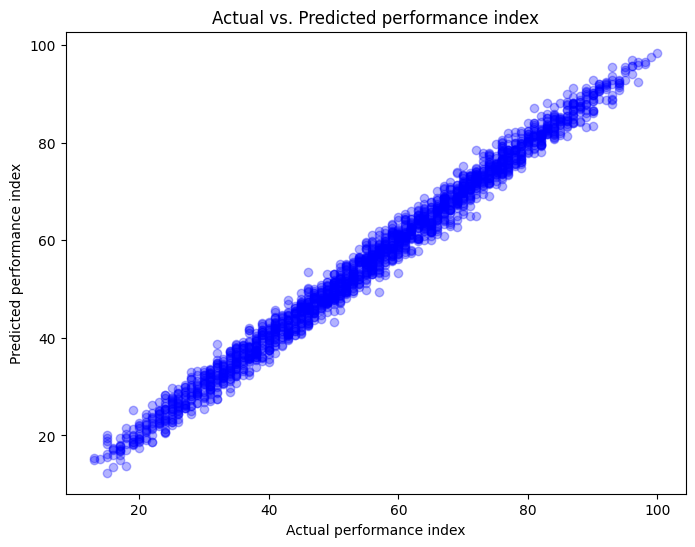

In [36]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.3)
plt.xlabel('Actual performance index')
plt.ylabel('Predicted performance index')
plt.title('Actual vs. Predicted performance index')
plt.show()

## Interpretation :

In [45]:
# Print the coefficients (slopes) for each feature to understand their impact on the performance index
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print('Intercept:',intercept)

Coefficients (Slopes):
Hours Studied: 2.85
Previous Scores: 1.02
Sleep Hours: 0.48
Extracurricular Activities_Yes: 0.62
Sample Question Papers Practiced: 0.20
Intercept: -34.119249567590934
